In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_pickle('../Data/ZEFR_Safety_Flag_Risk_Data.pkl')

In [3]:
#df.columns

In [4]:
df.drop(['vector1','vector2'], axis = 1, inplace = True)

In [5]:
concepts = []

for txt in df['TAXONOMY_NAME']:
    if '4A' in txt:
        result =  re.search('- (.*) -', txt)
        concepts.append(result.group(1))
    else:
        concepts.append(txt)

In [6]:
df['CONCEPTS'] = concepts

In [7]:
ZEFR_RISK = []

for txt in df['TAXONOMY_NAME']:
    if 'Minimal' in txt:
        ZEFR_RISK.append('Minimal')
    elif 'Low' in txt:
        ZEFR_RISK.append('Low')
    elif 'Medium' in txt:
        ZEFR_RISK.append('Medium')
    elif 'High' in txt:
        ZEFR_RISK.append('High')
    else:
        ZEFR_RISK.append('No GARM')

In [8]:
df['ZEFR_RISK'] = ZEFR_RISK

In [9]:
df.head()

,CHANNEL_ID,VIDEO_ID,IAS_CATEGORY,IAS_RISK,TAXONOMY_NAME,SCORE,DECISION,simscore,CONCEPTS,ZEFR_RISK
0,UCYHLd3HtyhRYsD5QMxsjRJA,_25OArlHkYU,Film & Animation,Medium,4A - Crime - [Minimal],1,True,0.0,Crime,Minimal
1,UCj1J3QuIftjOq9iv_rr7Egw,zwKnHMwVJ50,Gaming,Medium,4A - Online Piracy - [Minimal],1,True,0.0,Online Piracy,Minimal
4,UCvgfXK4nTYKudb0rFR6noLA,rZ5IgMydsT4,Sports,Medium,4A - Terrorism - [Minimal],1,True,0.0,Terrorism,Minimal
5,UCLjodVTY_kZzd3cQ7D82DhA,K4wRbQHW1ds,Howto & Style,Medium,4A - Online Piracy - [Minimal],1,True,0.0,Online Piracy,Minimal
6,UCdaluuQuE5GoOlULA2PGKmA,zmOMVrzWEXs,Gaming,Medium,4A - Social Issues - [Minimal],1,True,0.0,Social Issues,Minimal


In [10]:
same_risk = []

for i,v in enumerate(df['TAXONOMY_NAME']):
    if 'Minimal' in df['IAS_RISK'].iloc[i] and 'Minimal' in v:
        same_risk.append(1)
    elif 'Low' in df['IAS_RISK'].iloc[i] and 'Low' in v:
        same_risk.append(1)  
    elif 'Medium' in df['IAS_RISK'].iloc[i] and 'Medium' in v:
        same_risk.append(1) 
    elif 'High' in df['IAS_RISK'].iloc[i] and 'High' in v or 'Floor' in v:
        same_risk.append(1) 
    else:
        same_risk.append(0)
    

In [11]:
df['SAME_RISK'] = same_risk

In [12]:
#df['TAXONOMY_NAME'].unique()

In [13]:
zefr_expected = []

for i in df['ZEFR_RISK']:
    if 'High' in i or 'Medium' in i or 'Low' in i or 'Floor' in i:
        zefr_expected.append(1)
    else:
        zefr_expected.append(0)

In [15]:
predicted = []

for i in df['IAS_RISK']:
    if i == 'High' or i == 'Medium':
        predicted.append(1)
    else:
        predicted.append(0)

In [19]:
df['zefr_expected'] = zefr_expected
df['predicted'] = predicted

In [20]:
df.drop_duplicates(inplace = True)

In [21]:
df.head()

,CHANNEL_ID,VIDEO_ID,IAS_CATEGORY,IAS_RISK,TAXONOMY_NAME,SCORE,DECISION,simscore,CONCEPTS,ZEFR_RISK,SAME_RISK,zefr_expected,predicted
0,UCYHLd3HtyhRYsD5QMxsjRJA,_25OArlHkYU,Film & Animation,Medium,4A - Crime - [Minimal],1,True,0.0,Crime,Minimal,0,0,1
1,UCj1J3QuIftjOq9iv_rr7Egw,zwKnHMwVJ50,Gaming,Medium,4A - Online Piracy - [Minimal],1,True,0.0,Online Piracy,Minimal,0,0,1
4,UCvgfXK4nTYKudb0rFR6noLA,rZ5IgMydsT4,Sports,Medium,4A - Terrorism - [Minimal],1,True,0.0,Terrorism,Minimal,0,0,1
5,UCLjodVTY_kZzd3cQ7D82DhA,K4wRbQHW1ds,Howto & Style,Medium,4A - Online Piracy - [Minimal],1,True,0.0,Online Piracy,Minimal,0,0,1
6,UCdaluuQuE5GoOlULA2PGKmA,zmOMVrzWEXs,Gaming,Medium,4A - Social Issues - [Minimal],1,True,0.0,Social Issues,Minimal,0,0,1


In [25]:
df.to_clipboard()

In [22]:
X = df['zefr_expected']
y = df['predicted']

In [23]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(X, y)

print(cf_matrix)

[[     0 289283]
 [     0   9906]]


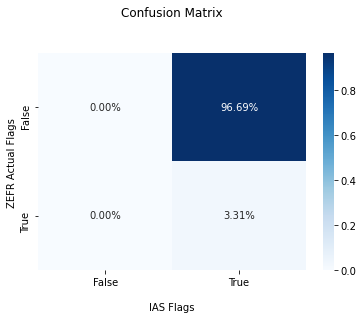

In [24]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nIAS Flags')
ax.set_ylabel('ZEFR Actual Flags ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

event = high/floor/medium/low flag <br>
no event = minimal flag <br>

True Positive = ZEFR-flagged videos, ALSO flagged by IAS <br>
False Positive = ZEFR-flagged videos, NOT flagged by IAS <br>
True Negative = ZEFR-no flag videos, ALSO not flagged by IAS <br>
False Negative = ZEFR-no flag videos, BUT flagged by IAS

This dataset is where ZEFR_RISK has a flag (incl. minimal) <br>
and there is a ZEFR GARM category